In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("http://18.190.90.90/datasets/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Data Dictionary

- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0-3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)

In [12]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [13]:
# 나이가 10 미만인 유효하지 않은 데이터 확인
df[df["age"] <=10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


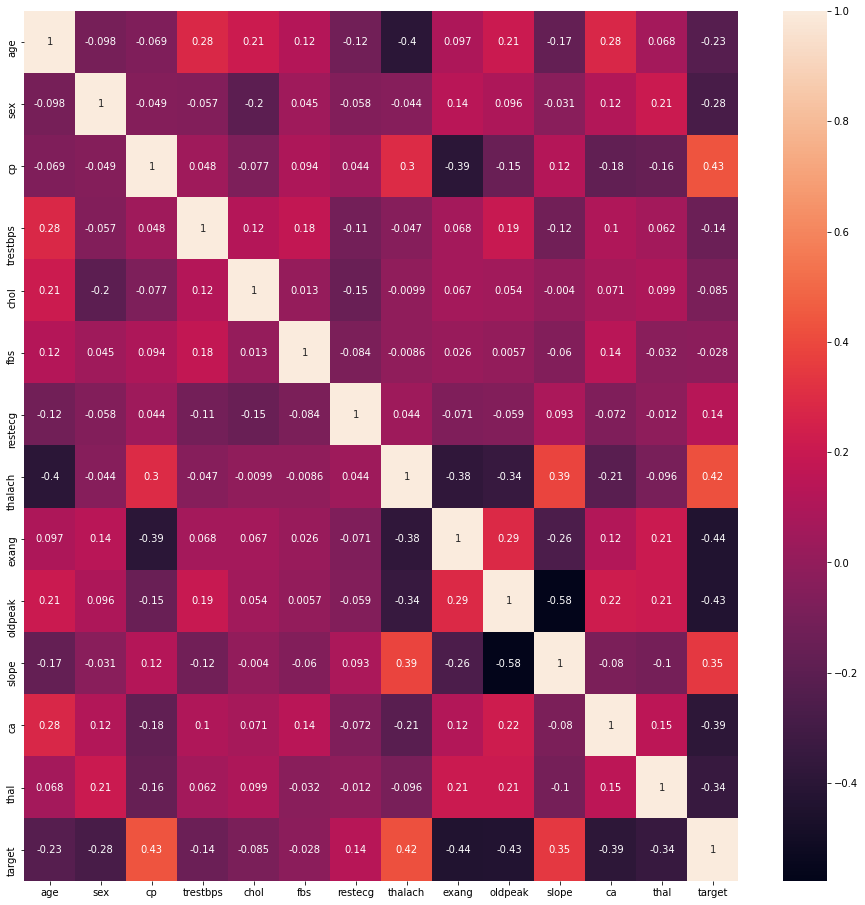

In [14]:
# 데이터로 부터 인사이트를 얻기 위해 시각화
cormat = df.corr()
fig = plt.figure(figsize=(16, 16))

sns.heatmap(cormat, annot=True)
plt.show()

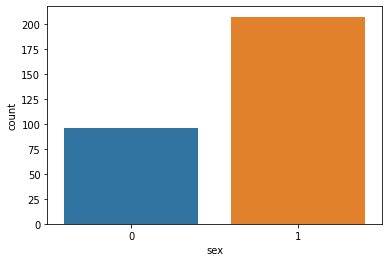

In [6]:
sns.countplot(x='sex', data=df)

In [7]:
#각각 성별별 갯수 구하기
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

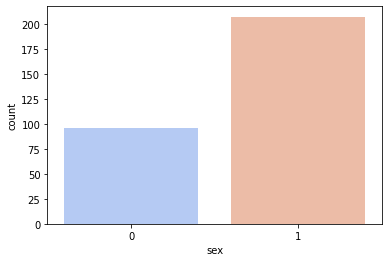

In [ ]:
sns.countplot(x='sex', data=df, palette='coolwarm')

In [ ]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

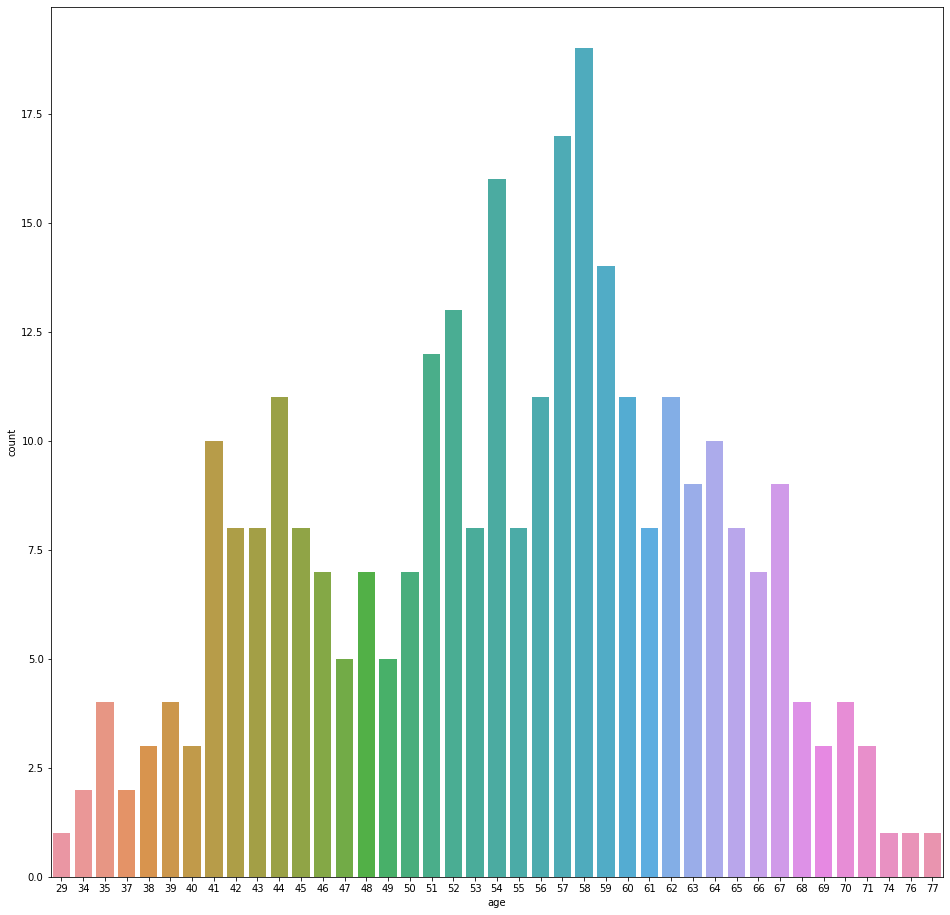

In [ ]:
plt.figure(figsize=(16, 16))
sns.countplot(x='age', data=df)

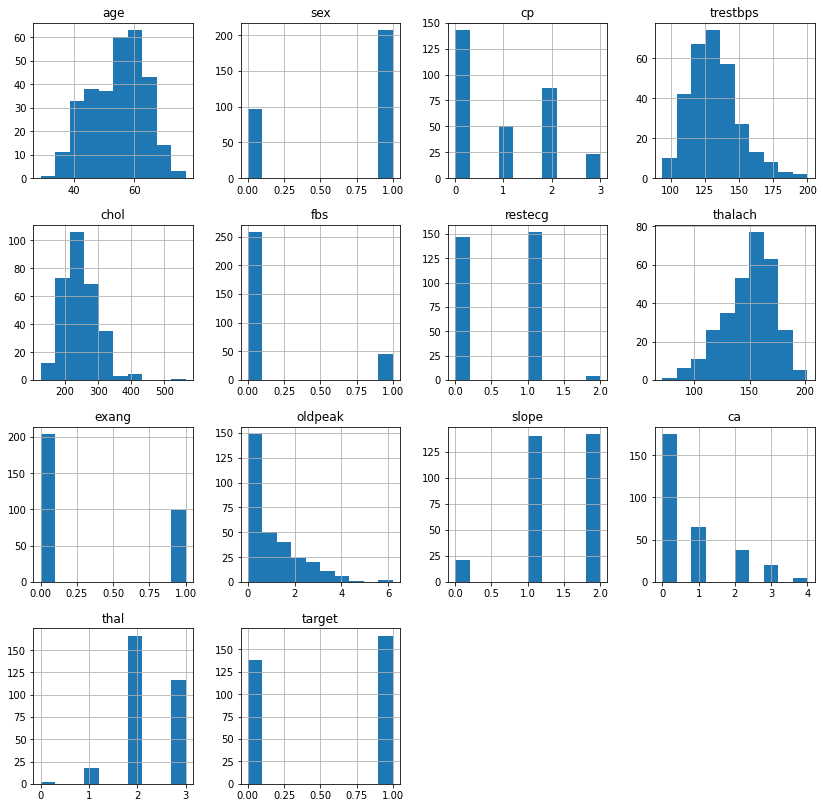

In [ ]:
# 전체 데이터 히스토 그램으로 살펴보기
df.hist(figsize=(14, 14))
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density. Either provide the bandwidth during initialization or use an alternative method.

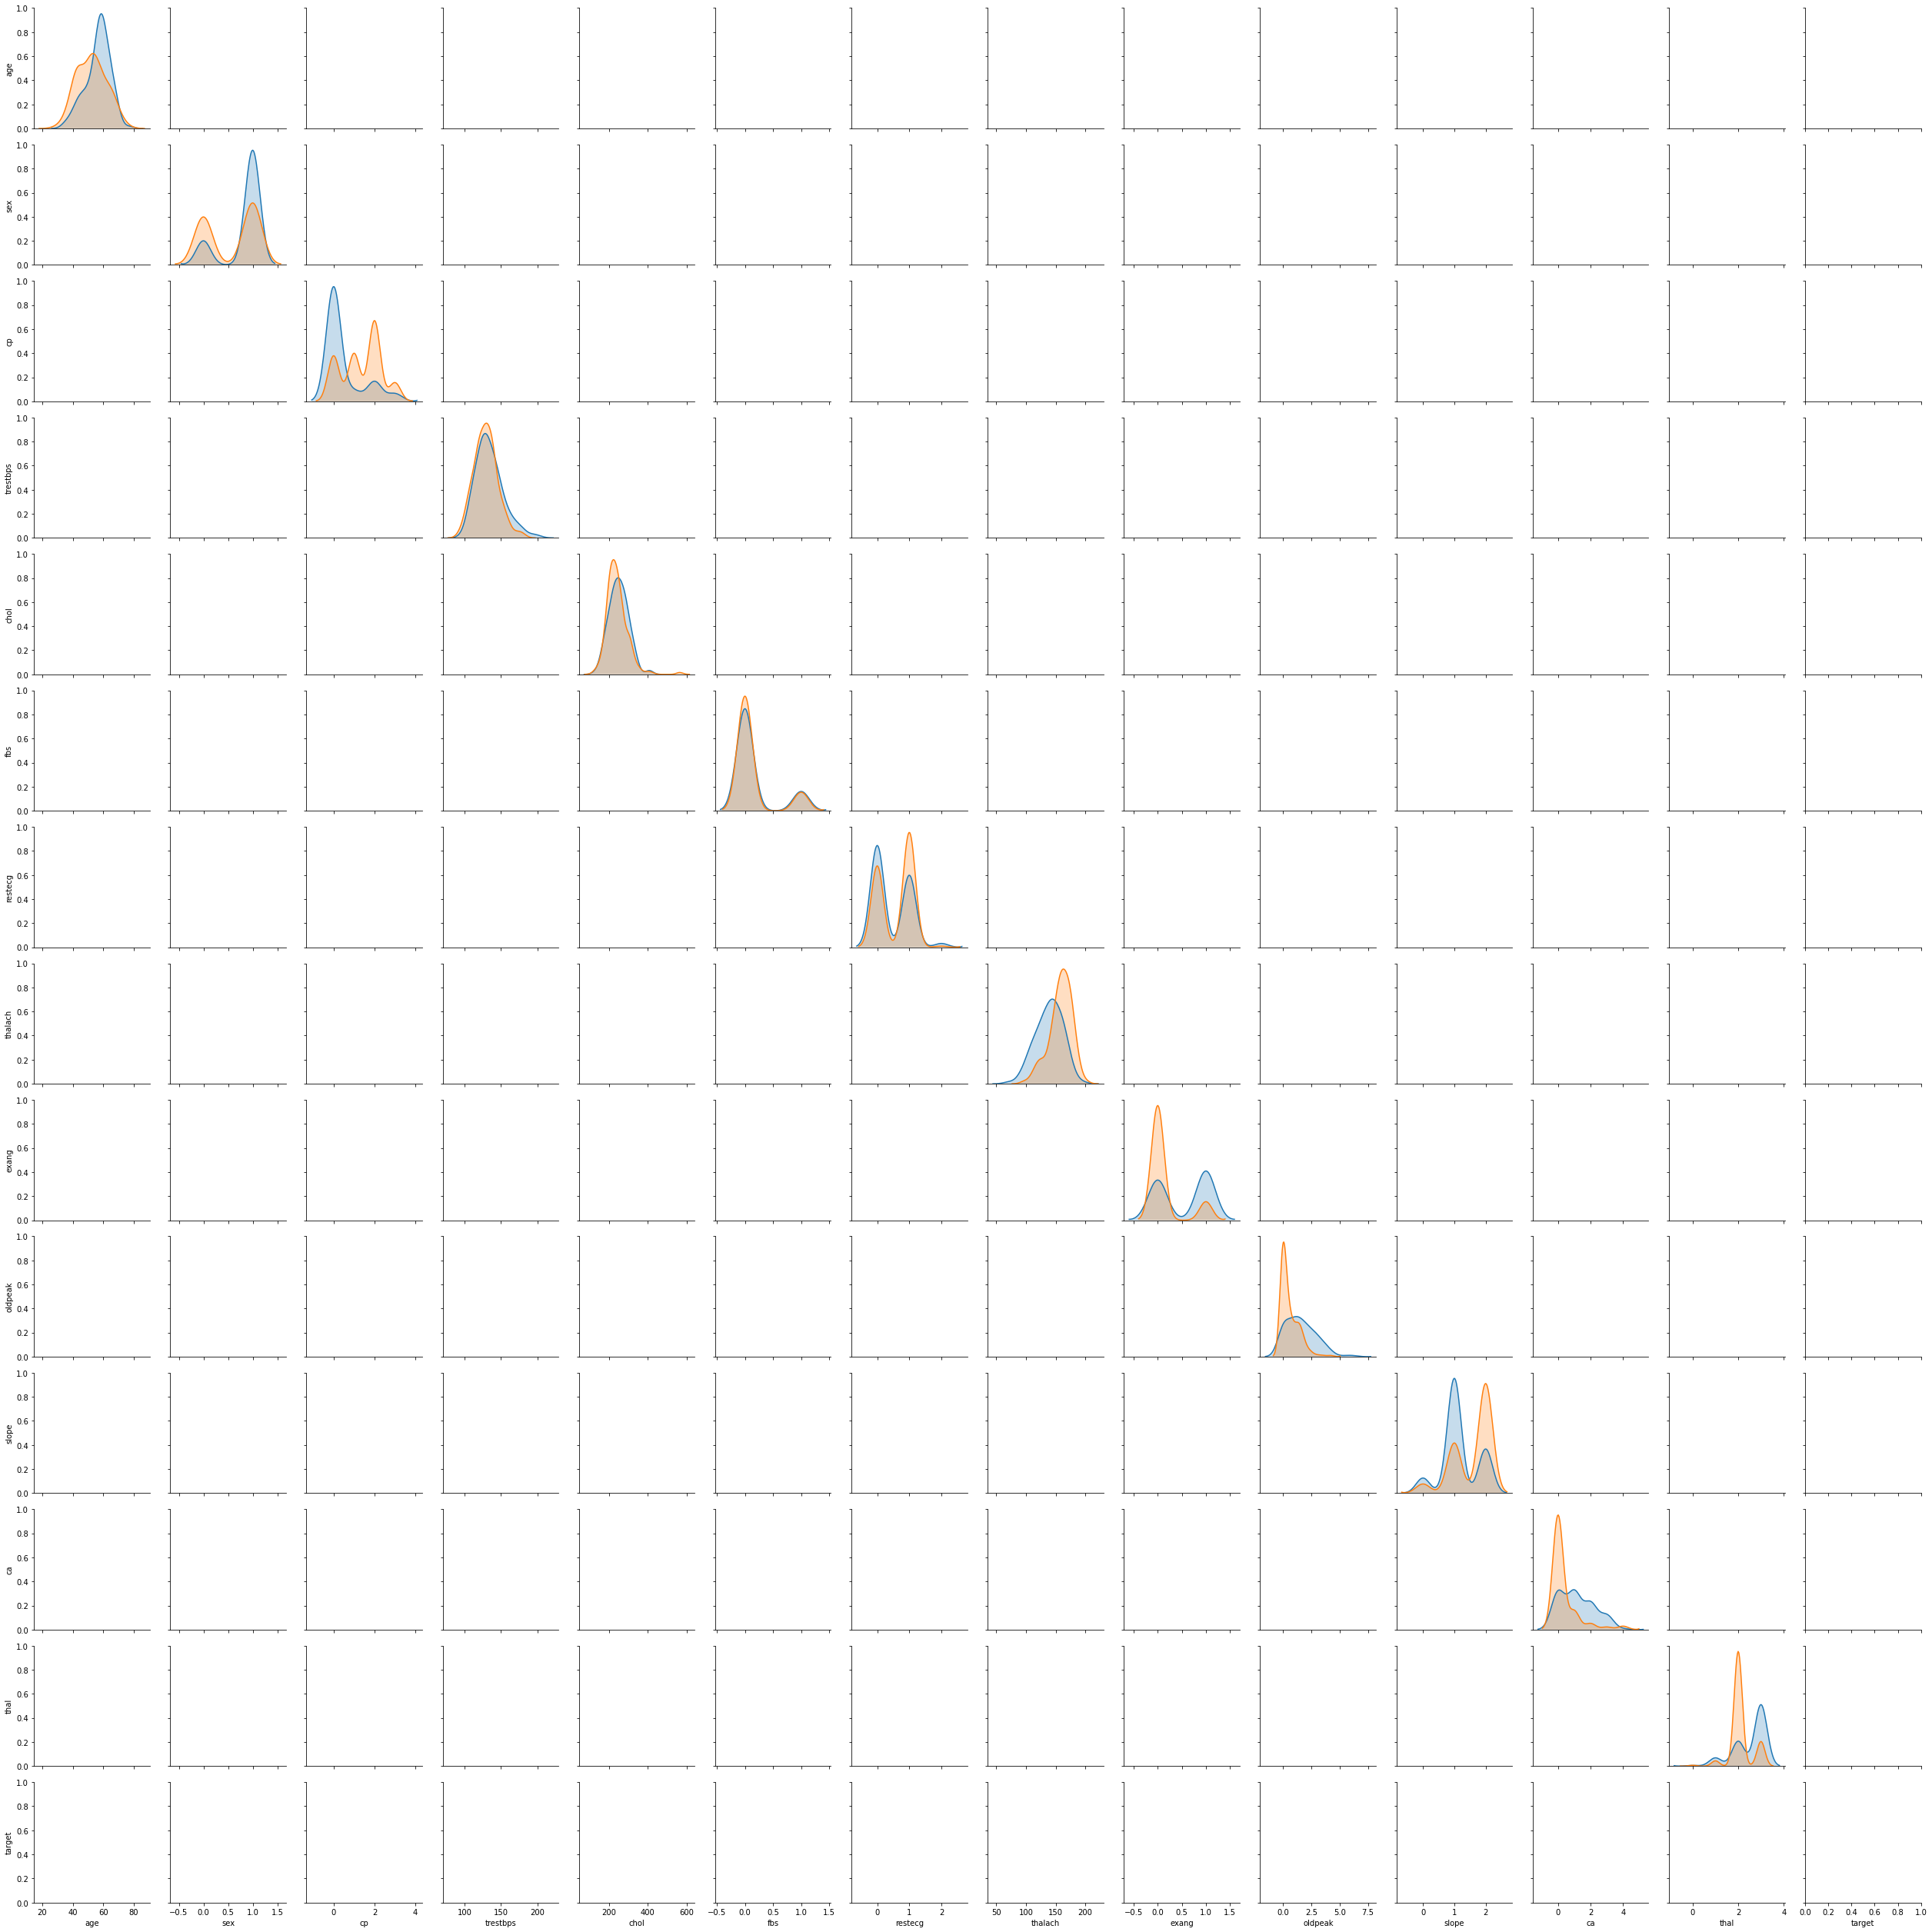

In [ ]:
sns.pairplot(df, hue='target')

In [ ]:
plt.figure(figsize=(16, 16))
sns.swarmplot(x=df["age"])

In [ ]:
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(16, 16))

In [ ]:
pd.crosstab(df.ca, df.target).plot(kind='bar', figsize=(16, 16))

In [ ]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='age', y='trestbps', hue='target', data=df)

In [ ]:
plt.figure(figsize=(15, 5))
sns.pointplot(x='age', y='trestbps', hue='target', data=df)

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='age', y='trestbps', hue='target', data=df)

In [ ]:
# 랜덤포레스트, 로지스틱 회귀, XGBoost

In [ ]:
dataX = df.drop('target', axis=1)

In [ ]:
dataX

In [ ]:
dataY = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=0)

In [ ]:
import numpy as np
penalty=['l1', 'l2']
C=np.logspace(0,4,10)         

In [ ]:
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
hyperparameters

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logistic, hyperparameters)

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
predict = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

In [ ]:
clf.best_params_

KNN - 최근접 이웃 알고리즘 - 최근접 몇개 살펴봐서 많은 이웃이 있는것으로 판단

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_clf.fit(x_train, y_train)

In [ ]:
predict = knn_clf.predict(x_test)
accuracy_score(y_test, predict)

In [ ]:
params = {'n_neighbors':list(range(1, 20)),
         'p': [1,2,3,4,5,6,7,8,9,10],
          'leaf_size':list(range(1,20)),
          'weights':['uniform', 'distance']
         }

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
KNNModel = GridSearchCV(knn, params, cv=3, n_jobs = -1)

In [ ]:
KNNModel.fit(x_train, y_train)

In [ ]:
predict = KNNModel.predict(x_test)
accuracy_score(y_test, predict)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_clf = SVC(kernel = 'linear', gamma = 1, C=1.0)

In [ ]:
svc_clf.fit(x_train, y_train)

In [ ]:
predict = svc_clf.predict(x_test)
accuracy_score(y_test, predict)

Reference
https://www.kaggle.com/ronitf/heart-disease-uci

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
xgb = XGBClassifier()

In [ ]:
xgb_model = GridSearchCV(xgb, params, cv=3, n_jobs = -1)

In [ ]:
xgb_model.fit(x_train, y_train)
